# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 2do parcial, 2019</center>           

La duración del parcial es de 3 horas. El parcial consta de 3 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al ejercicio 2. Hay un notebook por ejercicio planteado.

* [Ejercicio 2 - SVM](#Ejercicio2) (35 puntos)

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

<a id="Ejercicio2"></a>
# Ejercicio 2: SVM

En este ejercicio trabajaremos con el *Breast Cancer Wisconsin dataset*, el cuál contiene 569 vectores de características calculados a partir de muestras de células tumorales *benignas* y *malignas*. El *dataset* forma parte del conjunto de datos disponibles en *scikit-learn*. A continuación se levantan los datos.

In [2]:
data = load_breast_cancer()

In [3]:
X=data.data
y = data.target
print('Se levantaron %d muestras, %d malignas y %d benignas' % (len(X), np.sum(y==0),np.sum(y==1)))

Se levantaron 569 muestras, 212 malignas y 357 benignas


### Parte a)
Dividir el conjunto de datos disponible en 80\% para entrenamiento y 20\% para test.

**ATENCIÓN:** Puede ser útil utilizar alguna de las funciones importadas en la celda inicial.

In [6]:
np.random.seed(1)

####################################################################################
###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

####################################################################################
###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

### Parte b) 
Estandarizar los datos a media nula y varianza unidad.

**ATENCIÓN:** Puede ser útil utilizar alguna de las funciones importadas en la celda inicial.

In [7]:
####################################################################################
###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

####################################################################################
###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

## Curvas de aprendizaje

Se evaluará la pertinencia de estandarizar los datos cuando se utiliza un clasificador SVM con *kernel linear* (que denominaremos *SVM linear*). Para ello se propone utilizar el método `learning_curve` del módulo `model_selection` de *scikit-learn*. 

In [10]:
from sklearn.model_selection import learning_curve

### Parte c) 
Explique brevemente qué es lo que muestra una curva de aprendizaje y cómo la construye *scikit-learn*. 

**Respuesta:**  

Una curva de aprendizaje muestra el $E_{out}$ en función de las iteraciones o la variación de otros parámetros.

Si la curva de aprendizaje se crea variando parametros (factor de regularización por ejemplo), la curva se genera utilizando un conjunto de validación o validación cruzada. 

### Parte d) 
Complete la implementación de la siguiente celda a los efectos de mostrar las curvas de aprendizaje del clasificador *SVM linear* con parámetros por defecto utilizando como entrada:
    * características por defecto
    * características estandarizadas
    
La curvas mostradas deben contar con al menos 10 puntos y la validación cruzada se hará utilizando 10 *folds*. Note que la función `learning_curve` devuelve como medida de desempeño (`score`) un valor de `accuracy`, pero la curva de aprendizaje deberá mostrar el error.    


**ATENCIÓN:** La corrida puede demorar unos minutos, por lo que durante la etapa de implementación puede ser útil trabajar con menos *folds* y/o menos puntos en la curva.

Procesando datos sin estandarizar ...


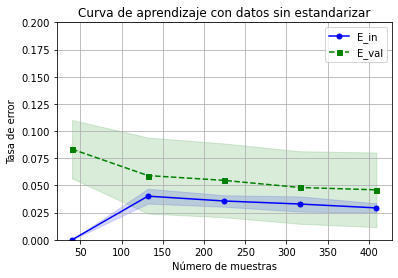

Procesando datos estandarizados ...


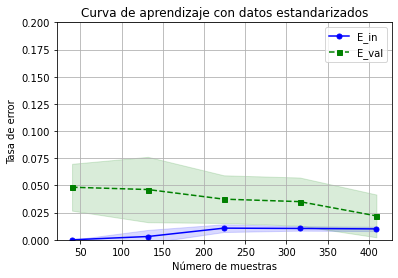

In [22]:
Xs = [X_train, X_train_std]  # entradas a evaluar: características por defecto y estandarizadas
preprocessing = ['sin estandarizar', 'estandarizados']

for i, X_i in enumerate(Xs):
    
    print('Procesando datos %s ...' % preprocessing[i])
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    train_sizes, train_scores, val_scores = learning_curve(SVC(kernel="linear"), X_i, y_train, cv=10)
    
    # Utilizar train_scores y val_scores para estimar, para cada punto de la curva, 
    # E_in_mean, E_val_mean y la desviaciones estandar E_in_std y E_val_std 
    # Observar que:
    #   train_scores : array, shape (n_ticks, n_cv_folds)
    #   val_scores : array, shape (n_ticks, n_cv_folds)
    
    E_in_mean = np.mean(1 - train_scores, axis=1)

    E_in_std = np.std(1 - train_scores, axis=1)

    E_val_mean = np.mean(1 - val_scores, axis=1)

    E_val_std = np.std(1 - val_scores, axis=1)

    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    plt.plot(train_sizes, E_in_mean, color='blue', marker='o', markersize=5,  label='E_in')
    plt.fill_between(train_sizes, E_in_mean + E_in_std,E_in_mean - E_in_std,alpha=0.15, color='blue')
    plt.plot(train_sizes, E_val_mean, color='green', linestyle='--', marker='s', markersize=5,label='E_val')
    plt.fill_between(train_sizes, E_val_mean + E_val_std, E_val_mean - E_val_std,alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Número de muestras')
    plt.ylabel('Tasa de error')
    plt.legend(loc='upper right')
    plt.ylim([0, 0.2])
    plt.title('Curva de aprendizaje con datos %s' % preprocessing[i] )
    plt.show()

##  Curvas de validación

Una forma de determinar los parámetro óptimos de un clasificador es mediante la utilización de curvas de validación. 

### Parte e)
En esta parte, en base a los resultados de la parte anterior, utilice datos estandarizados o sin estandarizar según lo que considere más apropiado. Complete la siguiente celda para determinar el valor óptimo del parámetro `C` del *SVM linear*. Para ello utilice el método `validation_curve` del módulo `model_selection`, que implementa validación cruzada.     
La grilla de valores de `C` a considerar es [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] y la validación cruzada se hará utilizando 10 *folds*. 

**ATENCIÓN:** La corrida puede demorar unos minutos, durante la etapa de implementación puede ser útil trabajar con menos *folds*.

In [28]:
from sklearn.model_selection import validation_curve

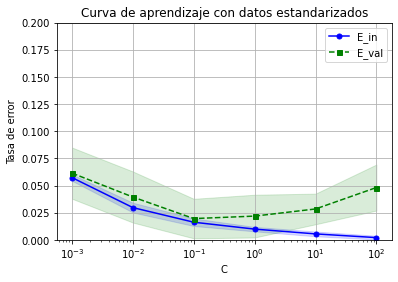

In [81]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

####################################################################################
###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################
# train_scores: matriz de tamaño len(param_range) x n_cv_folds con los errores de entrenamiento
# val_scores: matriz de tamaño len(param_range) x n_cv_folds con los errores de valicación

train_scores, val_scores = validation_curve(SVC(kernel="linear"), X_train_std, y_train, cv=10, param_name="C", 
                                            param_range=param_range)
    
E_in_mean = np.mean(1-train_scores, axis=1)

E_in_std = np.std(1-train_scores, axis=1)

E_val_mean = np.mean(1-val_scores, axis=1)

E_val_std = np.std(1-val_scores, axis=1)

    
####################################################################################
###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################


# se muestran los resultados 
plt.plot(param_range, E_in_mean, color='blue', marker='o', markersize=5, label='E_in')
plt.fill_between(param_range, E_in_mean + E_in_std, E_in_mean - E_in_std, 
                 alpha=0.15, color='blue')
plt.plot(param_range, E_val_mean, color='green', linestyle='--', marker='s',
         markersize=5, label='E_val')
plt.fill_between(param_range, E_val_mean + E_val_std, E_val_mean - E_val_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='upper right')
plt.xlabel('C')
plt.ylabel('Tasa de error')
plt.ylim([0, 0.2])
plt.title('Curva de aprendizaje con datos %s' % preprocessing[i] )
plt.show()

In [82]:
print("El error de validación para el mejor C={} es {:.1f}%".format(param_range[2], E_val_mean[2]*100))

El error de validación para el mejor C=0.1 es 2.0%


## GridSearch para SVM con kernel rbf

### Parte f) 
Para los mismo datos usados en la parte anterior, encuentre los valores óptimos de $C$ y $\gamma$ de un clasificador SVM con *kernel rbf* mediante el método de *grid search* con validación cruzada en 10 *folds*. Para ambos hyperparámetros utilizar una grilla con los siguientes valores: [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0].

**ATENCIÓN:** Puede ser útil utilizar alguna de las funciones importadas en la celda inicial.

In [83]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

####################################################################################
###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

param_grid = {"C": param_range, "gamma": param_range}

gs_rbf = GridSearchCV(SVC(kernel="rbf"), param_grid=param_grid, cv=10)
gs_rbf.fit(X_train_std, y_train)

####################################################################################
###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0]})

**Respuesta:** Los valores óptimos de $C$ y $\gamma$ son ...

In [84]:
# función auxiliar que muestra los parámetros del gridsearch
def mostrar_grid_search_results(rangoC, rangoGamma, resultados):
    '''
    Entrada:
        rangoC: lista con los valores de C evaluados
        rangoGamma: lista con los valores de gamma evaluados
        resultados: arrglo de tamaño (len(rangoC),len(rangoGamma)) con los resultados
                    del grid-search
    '''
    fig, ax = plt.subplots()
    im = ax.imshow(resultados, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set_ylabel('C')
    ax.set_ylim(-0.5,len(rangoC)-0.5)
    ax.set_xlim(-0.5,len(rangoGamma)-0.5)
    ax.set_yticks(range(len(rangoC)))
    ax.set_xticks(range(len(rangoGamma)))
    rangoC_labels = [str(c) for c in rangoC]
    ax.set_yticklabels(rangoC_labels)
    ax.set_xlabel('Gamma')
    rangoGamma_labels = [str(gamma) for gamma in rangoGamma]
    ax.set_xticklabels(rangoGamma_labels)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                    rotation_mode="anchor")
    plt.title('Resultados del Grid Search')

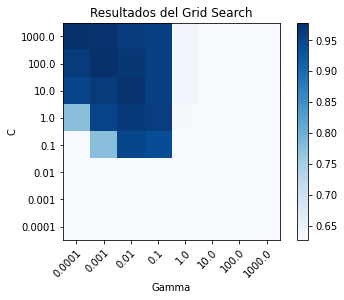

In [85]:
# gs.cv_results_
# Se muestran los resultados del grid-search
resultados = gs_rbf.cv_results_['mean_test_score']
resultados = resultados.reshape(len(param_range),len(param_range))
#print(resultados)
mostrar_grid_search_results(param_range, param_range, resultados)

In [86]:
print(gs_rbf.best_params_)
print("Score validación: {:.2f}%".format((1-gs_rbf.best_score_)*100))

{'C': 100.0, 'gamma': 0.001}
Score validación: 2.19%


El combo de parámetros que resulta en la mejor validación es $C=100$, $\gamma=0.001$

## Elección del clasificador óptimo

### Parte g)
Basándose en las evaluaciones realizadas, elegir el clasificador óptimo. Justificar la elección e indicar claramente las características que utilizará el clasificador y los parámetros óptimos del mismo, incluyendo el tipo de kernel.

**Respuesta:** 

El clasificador que obtuvo el mejor Eval es el lineal. Se utiliza $C=0.1$

### Parte h)
Para el clasificador óptimo elegido, indicar el número de vectores de soporte utilizados en cada clase.

In [90]:
####################################################################################
###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

clf_optimo = SVC(kernel="linear", C=0.1)

clf_optimo.fit(X_train_std, y_train)

n_vectores_soporte = np.sum(clf_optimo.n_support_)

####################################################################################
###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

### Parte i)
Mostrar la matriz de confusión con el conjunto de test e interpretar los resultados

In [97]:
####################################################################################
###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

y_test_pred = clf_optimo.predict(X_test_std) 

conf_matrix = confusion_matrix(y_test, y_test_pred)

print(conf_matrix)

####################################################################################
###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

[[39  3]
 [ 1 71]]


### Parte j) 
Suponga que se quiere lograr un punto de funcionamiento del clasificador en que se minimicen la cantidad de tumores malignos clasificados como benignos. Proponga al menos una variante en el procedimiento seguido que contribuya a lograr este objetivo. No se pide implementarla pero debe ser posible hacerlo con las funcionalidades que provee *scikit-learn*.

**Respuesta:**

In [ ]:
SVC()